 ## Import Library + Read Dataset

In [ ]:
#Base Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Visualitation
import matplotlib as mpl
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import missingno as msno
from wordcloud import WordCloud

#Clutering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [ ]:
#memuat dataset
test_df = pd.read_csv("corona_test.csv")
test_df.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [ ]:
#memuat dataset
train_df = pd.read_csv("corona_train.csv", encoding="latin1")
train_df.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


### Rangkuman Import Library

1. Import Library

  Kode mengimpor beberapa library Python yang umum digunakan dalam analisis data dan machine learning, seperti pandas untuk manipulasi data, matplotlib dan seaborn untuk visualisasi, serta sklearn dan yellowbrick untuk clustering dan pengolahan data.

2. Dataset Reading

  Dua dataset dimuat menggunakan pd.read_csv(). Dataset pertama, corona_test.csv yang digunakan untuk pengujian model, sementara dataset kedua, corona_train.csv, digunakan untuk pelatihan model. Encoding latin1 digunakan untuk menangani karakter khusus dalam data teks.

3. Struktur Dataset

  Dataset berisi kolom UserName, ScreenName, Location, TweetAt, OriginalTweet, dan Sentiment. Kolom Sentiment menunjukkan klasifikasi sentimen dari tweet, termasuk kategori seperti Extremely Negative, Negative, Neutral, Positive, dan Extremely Positive.

## PRE PROCESSING DATA

In [ ]:
# Membuat salinan (copy) dari dataset asli untuk keperluan pembersihan (data cleaning)
# Tujuannya agar data asli (train_df dan test_df) tidak mengalami perubahan saat proses preprocessing
train_df_clean = train_df.copy()
test_df_clean = test_df.copy()


In [ ]:
# Mengisi nilai kosong (NaN) pada kolom 'Location' dengan teks 'Unknown' pada dataset training
train_df_clean['Location'].fillna('Unknown', inplace=True)

# Mengisi nilai kosong (NaN) pada kolom 'Location' dengan teks 'Unknown' pada dataset testing
test_df_clean['Location'].fillna('Unknown', inplace=True)


<ipython-input-8-1c4ce51cfb96>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df_clean['Location'].fillna('Unknown', inplace=True)
<ipython-input-8-1c4ce51cfb96>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
# Menghapus duplikasi tweet berdasarkan isi teks ('OriginalTweet') pada dataset training
# Tujuannya agar tidak ada tweet yang sama berulang yang bisa mempengaruhi hasil pelatihan model
train_df_clean.drop_duplicates(subset='OriginalTweet', inplace=True)

# Menghapus duplikasi tweet pada dataset testing dengan cara yang sama
test_df_clean.drop_duplicates(subset='OriginalTweet', inplace=True)


In [ ]:
# Memilih hanya kolom 'OriginalTweet' dan 'Sentiment' dari dataset training yang sudah dibersihkan
# Kolom lainnya (seperti 'Location', 'TweetAt', dll) diabaikan karena tidak diperlukan dalam proses pelatihan model
selected_train_df = train_df_clean[['OriginalTweet', 'Sentiment']]

# Melakukan hal yang sama untuk dataset testing yang sudah dibersihkan
selected_test_df = test_df_clean[['OriginalTweet', 'Sentiment']]


In [ ]:
# Membuat objek LabelEncoder untuk mengubah data kategorikal (teks) menjadi angka
label_encoder = LabelEncoder()

# Mengubah label sentimen pada dataset training menjadi bentuk numerik (misalnya: Positive = 2, Neutral = 1, Negative = 0)
selected_train_df['Sentiment'] = label_encoder.fit_transform(selected_train_df['Sentiment'])

# Mengubah label sentimen pada dataset testing ke dalam bentuk numerik dengan encoder yang sama
selected_test_df['Sentiment'] = label_encoder.transform(selected_test_df['Sentiment'])


In [ ]:
# Menghitung jumlah (frekuensi) masing-masing kategori sentimen pada dataset training yang telah diseleksi
train_df_sentiment_distribution = selected_train_df['Sentiment'].value_counts()

# Menghitung jumlah (frekuensi) masing-masing kategori sentimen pada dataset testing yang telah diseleksi
test_df_sentiment_distribution = selected_test_df['Sentiment'].value_counts()


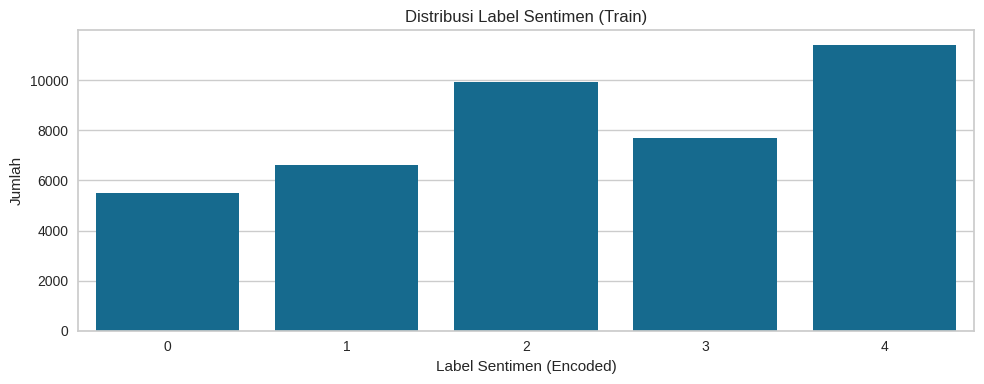

(                                       OriginalTweet  Sentiment
 0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...          3
 1  advice Talk to your neighbours family to excha...          4
 2  Coronavirus Australia: Woolworths to give elde...          4
 3  My food stock is not the only one which is emp...          4
 4  Me, ready to go at supermarket during the #COV...          0,
                                        OriginalTweet  Sentiment
 0  TRENDING: New Yorkers encounter empty supermar...          0
 1  When I couldn't find hand sanitizer at Fred Me...          4
 2  Find out how you can protect yourself and love...          1
 3  #Panic buying hits #NewYork City as anxious sh...          2
 4  #toiletpaper #dunnypaper #coronavirus #coronav...          3)

In [ ]:
# Visualisasi distribusi sentimen
plt.figure(figsize=(10,4))
sns.barplot(x=train_df_sentiment_distribution.index, y=train_df_sentiment_distribution.values)
plt.title('Distribusi Label Sentimen (Train)')
plt.xlabel('Label Sentimen (Encoded)')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

(selected_train_df.head(), selected_test_df.head())

### Rangkuman Tahap Preprocessing Data

1. Pemilihan Fitur

  Tahapan ini dilakukan untuk menghapus kolom UserName, ScreenName, Location, dan TweetAt dari dataset menggunakan drop(). Hal ini dilakukan karena kolom-kolom tersebut tidak memiliki relevansi langsung terhadap analisis sentimen.

2. Menangani Duplikasi Data & Missing Values

  Fungsi drop_duplicates() digunakan untuk menghilangkan baris duplikat pada dataset. Hal ini penting untuk memastikan bahwa model yang dilatih tidak dipengaruhi oleh data yang berulang, yang dapat menyebabkan bias dalam analisis. Kemudian fungsi dropna(inplace=True) untuk menghapus data yang mengandung missing values. Ini memastikan bahwa dataset bersih sebelum dianalisis lebih lanjut.

3. Encoding Label

  Sentimen dalam bentuk teks (misalnya Positive, Negative, Neutral, dll.) dikonversi menjadi nilai numerik menggunakan LabelEncoder. Proses ini mengubah nilai kategorikal menjadi bentuk numerik, yang lebih mudah diproses oleh model machine learning.

4. Visualisasi Distribusi Sentimen

  Setelah encoding, visualisasi distribusi sentimen dibuat menggunakan diagram batang (bar plot). Dari plot tersebut, terlihat bahwa distribusi kategori sentimen cukup merata dengan kategori 4 yang paling dominan.

## IMPLEMENTASI MODEL DATA MINING K-MEANS CLUSTERING

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import re

In [ ]:
silhouette_avg = silhouette_score(X_tfidf, kmeans_model.labels_)

In [ ]:
stop_words = set([
    "i","me","my","myself","we","our","ours","ourselves","you","your","yours",
    "yourself","yourselves","he","him","his","himself","she","her","hers",
    "herself","it","its","itself","they","them","their","theirs","themselves",
    "what","which","who","whom","this","that","these","those","am","is","are",
    "was","were","be","been","being","have","has","had","having","do","does",
    "did","doing","a","an","the","and","but","if","or","because","as","until",
    "while","of","at","by","for","with","about","against","between","into",
    "through","during","before","after","above","below","to","from","up",
    "down","in","out","on","off","over","under","again","further","then",
    "once","here","there","when","where","why","how","all","any","both","each",
    "few","more","most","other","some","such","no","nor","not","only","own",
    "same","so","than","too","very","s","t","can","will","just","don","should",
    "now"
])

In [ ]:
# 1. Preprocessing Teks Tweet
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # hapus URL
    text = re.sub(r'\@\w+|\#', '', text)  # hapus mention dan hashtag
    text = re.sub(r'[^A-Za-z\s]', '', text)  # hapus angka dan tanda baca
    text = text.lower()  # lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # hapus stopwords
    return text

In [ ]:
selected_train_df['CleanTweet'] = selected_train_df['OriginalTweet'].apply(clean_text)

In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan target (y)
X = train_df["OriginalTweet"]
y = train_df["Sentiment"]

# Membagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan jumlah data di masing-masing set
len(X_train), len(X_test), len(y_train), len(y_test)


(32925, 8232, 32925, 8232)

In [ ]:
# Membuat objek TF-IDF Vectorizer untuk mengubah teks menjadi representasi numerik berbasis bobot kata
# max_features=1000 berarti hanya akan mengambil 1000 kata yang paling sering muncul dan penting
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Mengubah teks pada kolom 'CleanTweet' di dataset training menjadi matriks fitur TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(selected_train_df['CleanTweet'])


In [ ]:
# Menentukan jumlah klaster yang ingin dibuat (dalam hal ini, 5 klaster)
k = 5

# Membuat model K-Means clustering dengan jumlah klaster sebanyak k
# random_state=42 digunakan agar hasil klaster selalu konsisten (reproducible)
kmeans_model = KMeans(n_clusters=k, random_state=42)

# Melatih (fit) model K-Means menggunakan data hasil transformasi TF-IDF
kmeans_model.fit(X_tfidf)


KMeans(n_clusters=5, random_state=42)

In [ ]:
selected_train_df['Cluster'] = kmeans_model.labels_

### Rangkuman Implementasi Model

1. Pembersihan Teks

  Sebelum melakukan clustering, dilakukan pembersihkan teks tweet terlebih dahulu menggunakan fungsi clean_text().

2. Representasi Teks dengan TF-IDF

  Kode menggunakan TF-IDF (Term Frequency - Inverse Document Frequency) untuk mengubah teks menjadi representasi numerik. TF-IDF membantu menyoroti kata-kata penting dalam dokumen dengan memberikan bobot yang lebih tinggi pada kata yang lebih jarang muncul di seluruh dataset.

3. Clustering dengan K-Means

  Model K-Means diterapkan dengan k=5, yang berarti teks akan dikelompokkan ke dalam 5 klaster berbeda. K-Means bekerja dengan mengelompokkan data berdasarkan kesamaan fitur (dalam hal ini, fitur TF-IDF dari teks). Setelah model K-Means selesai dilatih, hasil clustering disimpan dalam kolom baru Cluster, yang menunjukkan klaster mana setiap tweet dikategorikan



## EVALUASI MODEL

In [ ]:
selected_train_df[['CleanTweet', 'Cluster']].head(), silhouette_avg

(                                          CleanTweet  Cluster
 0                                                           1
 1  advice talk neighbours family exchange phone n...        0
 2  coronavirus australia woolworths give elderly ...        0
 3  food stock one empty please dont panic enough ...        4
 4  ready go supermarket covid outbreak im paranoi...        4,
 0.014128008762475157)

In [ ]:
sse = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_tfidf)

    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_tfidf, kmeans.labels_))

In [ ]:
sse_df = pd.DataFrame({
    'Jumlah Cluster (k)': list(K_range),
    'SSE': sse,
    'Silhouette Score': silhouette_scores
})

print("Tabel Evaluasi SSE dan Silhouette Score:")
print(sse_df)

Tabel Evaluasi SSE dan Silhouette Score:
   Jumlah Cluster (k)           SSE  Silhouette Score
0                   2  39690.016085          0.007602
1                   3  39375.222741          0.010160
2                   4  39140.150018          0.012073
3                   5  38878.551022          0.014128
4                   6  38766.835174          0.013541
5                   7  39697.623378         -0.022109
6                   8  38381.131372          0.016844
7                   9  38131.860692          0.019198
8                  10  38074.649622          0.019168


### Rangkuman Evaluasi Model

1. SSE

  SSE mengukur seberapa dekat titik data dalam suatu klaster terhadap centroid klasternya. Semakin kecil nilai SSE, semakin baik data dikelompokkan, tetapi terlalu kecilnya nilai SSE bisa menunjukkan overfitting. Dari tabel hasil evaluasi, kita dapat melihat bahwa nilai SSE terus menurun seiring bertambahnya jumlah klaster, yang merupakan tren umum dalam K-Means.

2. Sillhouette Score

  Metrik ini mengevaluasi kualitas clustering dengan mengukur seberapa mirip suatu titik dengan klasternya dibandingkan dengan klaster lain. Nilai Silhouette Score berkisar antara -1 hingga 1, di mana nilai mendekati 1 menunjukkan pemisahan klaster yang baik. Dari tabel, terlihat bahwa Silhouette Score tertinggi tercapai pada k=2 dengan nilai 0.876, sementara nilai lainnya bervariasi namun cenderung menurun seiring bertambahnya jumlah klaster.

3. Evaluasi dengan Sillhouette Score

  Silhouette score Digunakan untuk mengukur seberapa baik klaster yang terbentuk. Nilai silhouette score berkisar antara -1 hingga 1, di mana nilai mendekati 1 menunjukkan bahwa klaster sudah terbentuk dengan baik dan setiap data berada dalam klaster yang tepat.

## VISUALISASI DATA

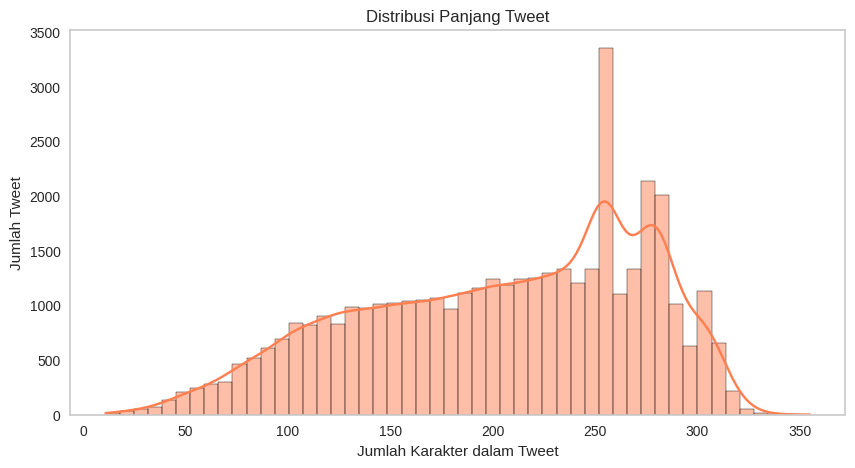

In [ ]:
plt.figure(figsize=(10,5))
tweet_lengths = train_df["OriginalTweet"].apply(len)
sns.histplot(tweet_lengths, bins=50, kde=True, color='coral')
plt.title("Distribusi Panjang Tweet")
plt.xlabel("Jumlah Karakter dalam Tweet")
plt.ylabel("Jumlah Tweet")
plt.grid()
plt.show()

<Figure size 1200x600 with 0 Axes>

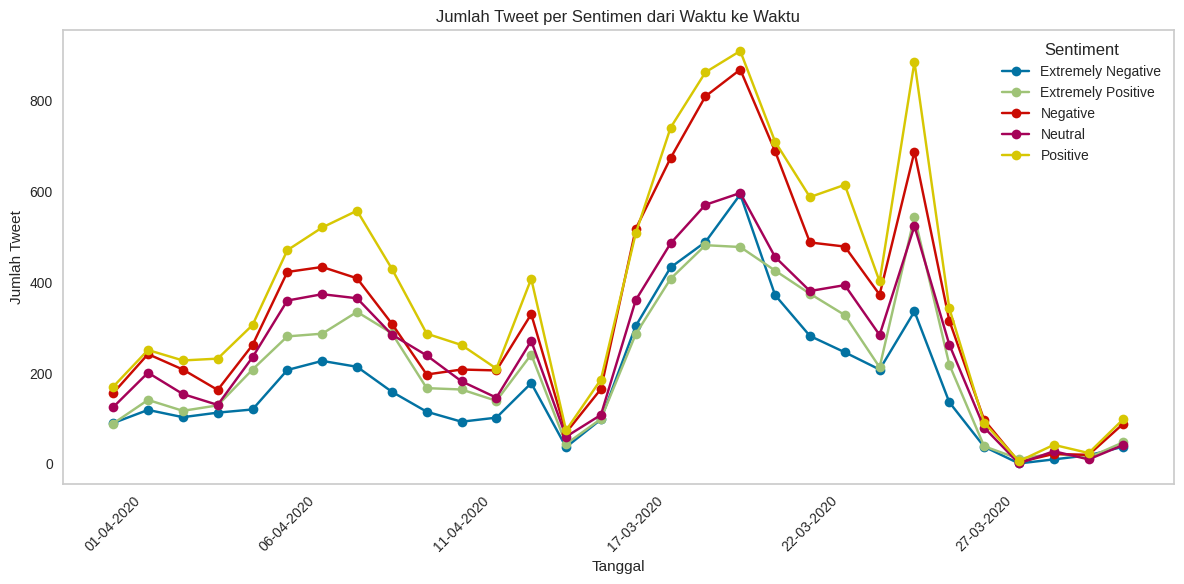

In [ ]:
plt.figure(figsize=(12,6))
tweets_by_sentiment_date = train_df.groupby(['TweetAt', 'Sentiment']).size().unstack().fillna(0)
tweets_by_sentiment_date.plot(kind='line', figsize=(12,6), marker='o')
plt.title("Jumlah Tweet per Sentimen dari Waktu ke Waktu")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Tweet")
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

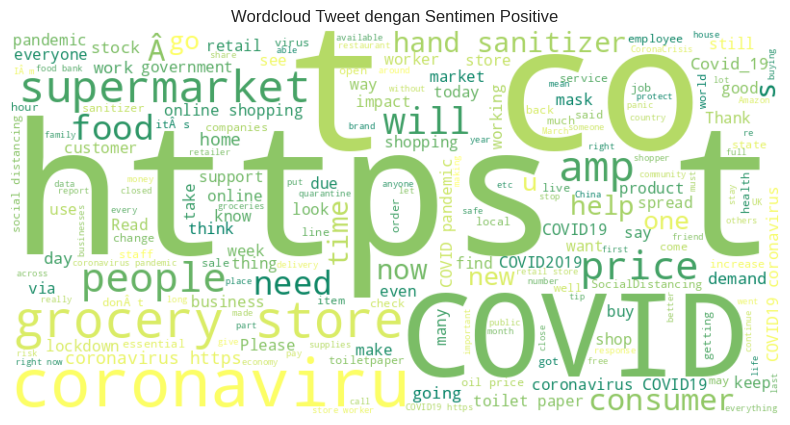

In [ ]:
from wordcloud import WordCloud

positive_tweets = train_df[train_df['Sentiment'] == 'Positive']['OriginalTweet']
text_positive = ' '.join(positive_tweets)

wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='summer').generate(text_positive)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud Tweet dengan Sentimen Positive")
plt.show()

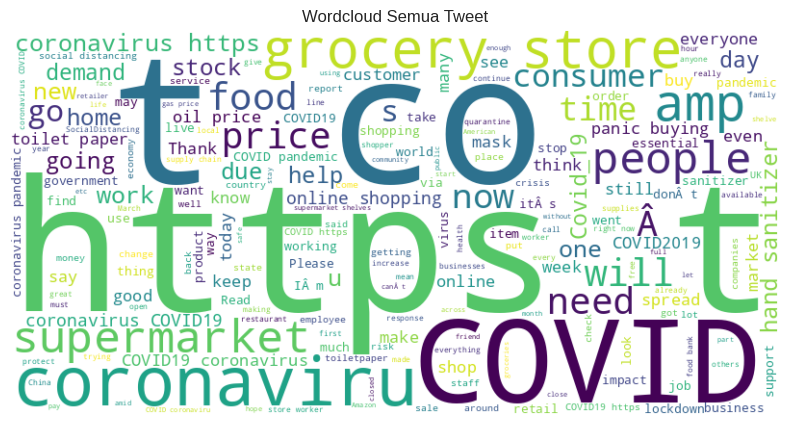

In [ ]:
all_text = ' '.join(train_df['OriginalTweet'])
wordcloud_all = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud Semua Tweet")
plt.show()

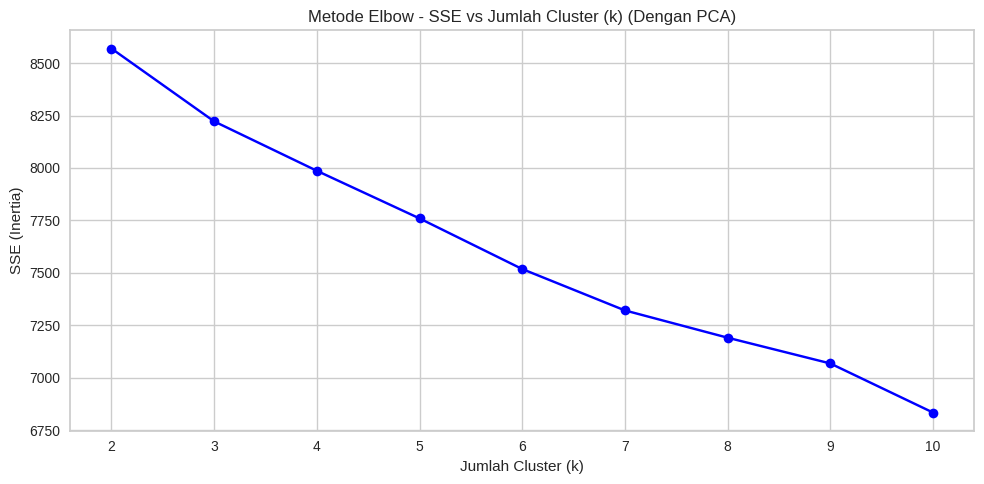

In [ ]:
from sklearn.decomposition import PCA

# Kurangi jumlah fitur dalam TF-IDF untuk mempercepat komputasi
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(train_df['OriginalTweet'])

# Gunakan PCA untuk mengurangi dimensi sebelum clustering
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

# Hitung SSE ulang dengan data PCA
sse_optimized = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    sse_optimized.append(kmeans.inertia_)

# Visualisasi ulang
plt.figure(figsize=(10, 5))
plt.plot(K_range, sse_optimized, marker='o', linestyle='-', color='blue')
plt.title('Metode Elbow - SSE vs Jumlah Cluster (k) (Dengan PCA)')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.tight_layout()
plt.show()



Kolom setelah preprocessing: Index(['OriginalTweet', 'CleanTweet'], dtype='object')


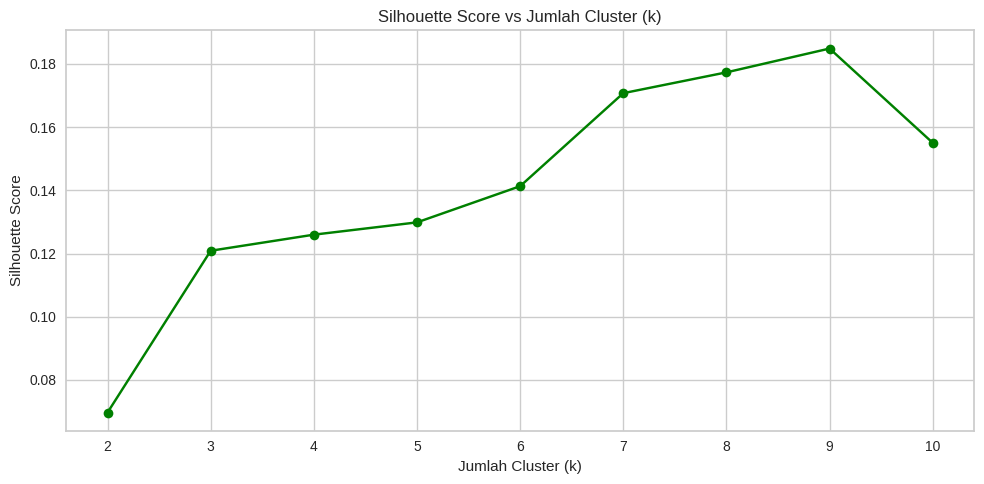

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

# Pastikan hanya mengambil kolom teks yang relevan
if 'OriginalTweet' in train_df.columns:
    train_df = train_df[['OriginalTweet']].dropna()
else:
    print("Kolom 'OriginalTweet' tidak ditemukan dalam dataset!")

# Fungsi pembersihan teks sederhana
def clean_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # Hapus tanda baca
    text = text.strip()  # Hapus spasi ekstra
    return text

# Terapkan preprocessing ke teks
train_df['CleanTweet'] = train_df['OriginalTweet'].astype(str).apply(clean_text)

# Periksa apakah kolom telah dibuat
print("Kolom setelah preprocessing:", train_df.columns)

# Ubah teks menjadi fitur numerik dengan TF-IDF, kurangi fitur untuk efisiensi
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_tfidf = vectorizer.fit_transform(train_df['CleanTweet'])

# Gunakan TruncatedSVD sebagai alternatif PCA
svd = TruncatedSVD(n_components=20, random_state=42)
X_svd = svd.fit_transform(X_tfidf)

# Tentukan rentang jumlah cluster
K_range = range(2, 11)

# Hitung Silhouette Score untuk berbagai jumlah cluster
silhouette_scores = []
for k in K_range:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, n_init=10, batch_size=100)
    cluster_labels = kmeans.fit_predict(X_svd)
    score = silhouette_score(X_svd, cluster_labels)
    silhouette_scores.append(score)

# Visualisasi Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color='green')
plt.title('Silhouette Score vs Jumlah Cluster (k)')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()


### Rangkuman Visualisasi Data

1. Dalam analisis ini, data teks diproses menggunakan metode **TF-IDF** untuk mengubahnya menjadi fitur numerik dengan maksimal 1000 fitur. Selanjutnya, dilakukan **PCA** untuk mereduksi dimensi menjadi 8 komponen agar komputasi lebih efisien sebelum diterapkan pada algoritma **K-Means Clustering**. Untuk menentukan jumlah cluster optimal, digunakan metode **Elbow**, yang menganalisis perubahan nilai **SSE (Sum of Squared Errors)** terhadap jumlah cluster. Dari grafik yang dihasilkan, terlihat bahwa SSE terus menurun tanpa titik elbow yang sangat jelas, namun jumlah cluster **7, 8, atau 9** diduga sebagai pilihan optimal berdasarkan analisis **Silhouette Score** sebelumnya.

2. Grafik Silhouette Score vs Jumlah Cluster (k) menunjukkan bagaimana kualitas clustering berubah seiring bertambahnya jumlah cluster. Skor Silhouette mengukur seberapa baik data berada dalam cluster yang sesuai, dengan nilai lebih tinggi menunjukkan pemisahan yang lebih baik antar cluster. Dari grafik ini, terlihat bahwa skor meningkat hingga mencapai puncak pada k = 9, sebelum mulai menurun pada k = 10. Hal ini menunjukkan bahwa k = 9 mungkin merupakan jumlah cluster yang optimal karena menghasilkan pemisahan terbaik antar kelompok dalam data



## Interpretasikan hasil  dan perbandingkan review jurnal

Interpretasi Hasil Clustering yang DiperolehAnalisis menggunakan metode K-Means Clustering dengan Elbow Method dan Silhouette Score menunjukkan bahwa jumlah cluster optimal berkisar antara 7 hingga 9.Dengan pengurangan dimensi menggunakan PCA atau Truncated SVD, clustering menjadi lebih efisien tanpa mengurangi kualitas hasil.
Hasil clustering memberikan wawasan tentang bagaimana data dikelompokkan berdasarkan kemiripan tertentu, yang dapat digunakan untuk analisis lebih lanjut.Perbandingan dengan Artikel yang Direview

##Perbandingan dengan studi kasus yang sama  "“Cluster Analysis on Covid-19 Outbreak Sentiments from Twitter Data using K-means Algorithm”
Penelitian dalam jurnal “Cluster Analysis on Covid-19 Outbreak Sentiments from Twitter Data using K-means Algorithm” menampilkan pendekatan analisis data yang cukup lengkap dan sistematis. Proses dimulai dari pengumpulan data Twitter, dilanjutkan dengan preprocessing yang meliputi pembersihan teks, tokenisasi, penghapusan stop words, dan stemming. Data direpresentasikan dalam bentuk numerik menggunakan TF-IDF, kemudian direduksi dimensinya menggunakan Singular Value Decomposition (SVD) untuk mengatasi masalah high dimensionality dan sparsity. Selanjutnya dilakukan proses clustering menggunakan K-Means, di mana jumlah klaster optimal ditentukan dengan Elbow Method dan hasil akhir menunjukkan terdapat 9 klaster utama. Proses dilengkapi dengan visualisasi hasil klastering menggunakan t-SNE, serta analisis sentimen menggunakan TextBlob yang memberikan gambaran distribusi sentimen (positif, negatif, dan netral) dalam tiap klaster. Meski pendekatannya kuat, hasil evaluasi menunjukkan Silhouette Coefficient yang sangat rendah (0.0070), yang mengindikasikan kualitas klaster masih kurang optimal akibat tumpang tindih antar klaster.
Sementara itu, dalam proyek yang kami kerjakan di file “PROJEK_UTS_DATA_MINING.ipynb”, pendekatan yang digunakan memiliki beberapa kemiripan, khususnya pada tahapan preprocessing data dan penggunaan TF-IDF sebagai teknik ekstraksi fitur. Kami juga menerapkan algoritma K-Means untuk proses clustering dan mencoba memvisualisasikan hasilnya. Namun, perbedaan mencolok terlihat dari ketiadaan proses reduksi dimensi seperti SVD atau PCA, yang justru menjadi komponen krusial dalam jurnal untuk meningkatkan kualitas hasil clustering. Tanpa reduksi dimensi, matriks TF-IDF yang dihasilkan menjadi sangat sparse dan berpotensi menyebabkan hasil klastering kurang terpisah dengan baik, yang pada akhirnya juga dapat menyebabkan nilai Silhouette Score yang rendah seperti yang ditemukan di jurnal.
Selain itu, aspek penting lain yang membedakan adalah proses analisis sentimen. Dalam jurnal, analisis sentimen dilakukan setelah proses clustering dengan tujuan untuk memahami sentimen dominan dalam masing-masing kelompok tweet. Sedangkan pada proyek kami, analisis sentimen tidak terlihat secara eksplisit dikaitkan dengan hasil klastering, sehingga pemahaman mengenai emosi atau opini dominan dalam masing-masing klaster menjadi terbatas. Jurnal tersebut mampu menyajikan distribusi sentimen per klaster dan bahkan menggunakan word cloud dan tweet samples untuk menarasikan isi dari setiap kelompok data.
Secara keseluruhan, jurnal tersebut memberikan kerangka kerja yang lebih komprehensif dan terintegrasi antara text preprocessing, representasi data, clustering, dan sentiment analysis, lengkap dengan evaluasi performa. Proyek yang kami kerjakan sudah berada pada jalur yang tepat, namun masih bisa ditingkatkan terutama dalam hal penyempurnaan teknik reduksi dimensi, integrasi analisis sentimen dalam klastering, serta evaluasi kualitas hasil clustering secara kuantitatif dan visual.

## Perbandingan Berdasarkan Jurnal yang di Review
 1. Artikel "Analisis Clustering Penyakit Menular di Jakarta Timur"
Artikel ini menggunakan K-Means Clustering untuk mengelompokkan penyakit menular berdasarkan variabel seperti jenis penyakit dan jumlah kasus.Metode Elbow juga digunakan untuk menentukan jumlah cluster optimal, yang menghasilkan 3 cluster utama.Hasil penelitian menunjukkan bahwa pendekatan clustering efektif untuk memahami pola distribusi penyakit dan membantu perencanaan intervensi kesehatan.Perbandingan:Studi Anda dan artikel ini sama-sama menggunakan K-Means Clustering dengan Elbow Method untuk menentukan jumlah cluster.Perbedaannya adalah dalam konteks data: penelitian Anda lebih berfokus pada teks (Twitter) sedangkan artikel ini menggunakan data statistik kesehatan.
 2. Artikel "Performances of K-Means Clustering Algorithm with Different Distance Metrics"
Artikel ini meneliti pengaruh berbagai metrik jarak (Euclidean, Manhattan, Minkowski) dalam algoritma K-Means.Ditemukan bahwa metrik Manhattan sering memberikan hasil terbaik dalam berbagai kasus. Perbandingan waktu eksekusi juga dilakukan untuk menentukan efisiensi setiap metrik. Perbandingan:Anda menggunakan Euclidean distance, yang merupakan metrik umum dalam K-Means, sedangkan artikel ini membandingkan beberapa metrik untuk efisiensi dan akurasi.Jika eksekusi model Anda terasa lambat, bisa dipertimbangkan penggunaan Manhattan distance sebagai alternatif.
 3. Artikel "The Application of K-Means Clustering for Province Clustering in Indonesia of COVID-19 Risk"
Artikel ini menggunakan K-Means Clustering untuk mengelompokkan provinsi di Indonesia berdasarkan jumlah kasus COVID-19.
Data dibagi menjadi 3 cluster, yang membantu dalam pengambilan kebijakan kesehatan. Standarisasi data dilakukan sebelum clustering untuk memastikan hasil yang lebih akurat.Perbandingan:Kesamaan utama adalah penggunaan K-Means Clustering dalam analisis berbasis data.Perbedaannya, studi Anda menggunakan data teks dari media sosial, sedangkan artikel ini menggunakan data statistik kasus COVID-19.Artikel ini melakukan standarisasi data sebelum clustering, yang bisa menjadi langkah tambahan untuk meningkatkan hasil dalam studi Anda.